In [1]:
import pandas as pd
import numpy as np
import pickle 
import torch
from scripts.visualisation import plot_cpg_reconstruction, plot_activations_latSpace
from data.prepareData import prepareDataLoader_fromPkl
import matplotlib.pyplot as plt
import umap.umap_ as umap

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score

# Load Data

In [2]:
PATH_data = "data"
PATH_results = "logs"

with open(os.path.join(PATH_data, "chr22_overlap_test_methyl_array.pkl"), "rb") as f: test_dataset = pickle.load(f) #
test_tensor = torch.tensor(test_dataset["beta"].values, dtype=torch.float32)

In [3]:
batch_size = 64

train_data = prepareDataLoader_fromPkl(f"{PATH_data}/chr22_overlap_train_methyl_array.pkl")
train_dataloader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size, 
                                               shuffle=False,
                                               num_workers=6)
                                        
val_data = prepareDataLoader_fromPkl(f"{PATH_data}/chr22_overlap_val_methyl_array.pkl")
val_dataloader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size, 
                                               shuffle=False,
                                               num_workers=6)


# Predict Age from original input
with RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(random_state=0)

## remove NAs 
X = train_data.returnTensor_()[0].detach().numpy()
y = train_data.returnTensor_()[1].detach().numpy()

df = pd.DataFrame(y)
X_orig = X[df.notna()[0]]
y_orig = df[df.notna()[0]]

# y_pred_orig = cross_val_predict(regr, X_orig, y_orig)
# r2 = cross_val_score(regr, X_orig, y_orig)

/tmp/ipykernel_7527/4012733290.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred_orig = regr.fit(X_orig,y_orig).score(X_orig,y_orig)


# Load Model

In [5]:
name="dyingLatentFeatures/AE_10lat"
model = torch.load(f"logs/{name}/checkpoint/trainedModel.pth", map_location=torch.device('cpu'))
model

normalAE(
  (encoder): Sequential(
    (0): Linear(in_features=4671, out_features=2000, bias=True)
    (1): PReLU(num_parameters=1)
    (2): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=2000, out_features=500, bias=True)
    (4): PReLU(num_parameters=1)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=10, bias=True)
    (7): PReLU(num_parameters=1)
    (8): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=500, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=500, out_features=2000, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=2000, out_features=4671, bias=True)
    (5): Sigmoid()
  )
)

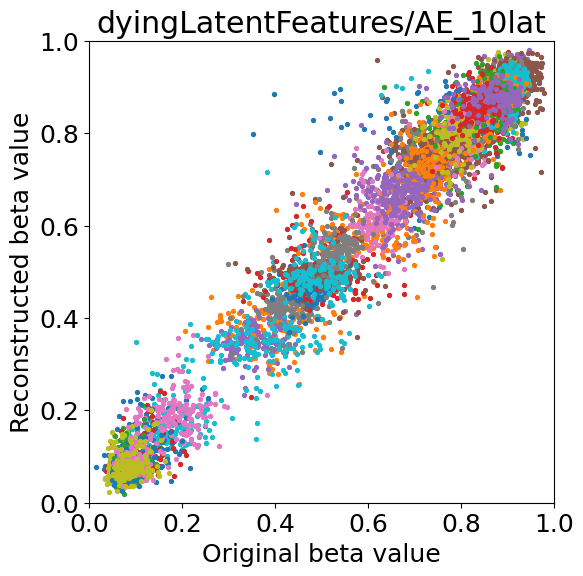

In [6]:
plot_cpg_reconstruction(model, test_tensor, title=name)

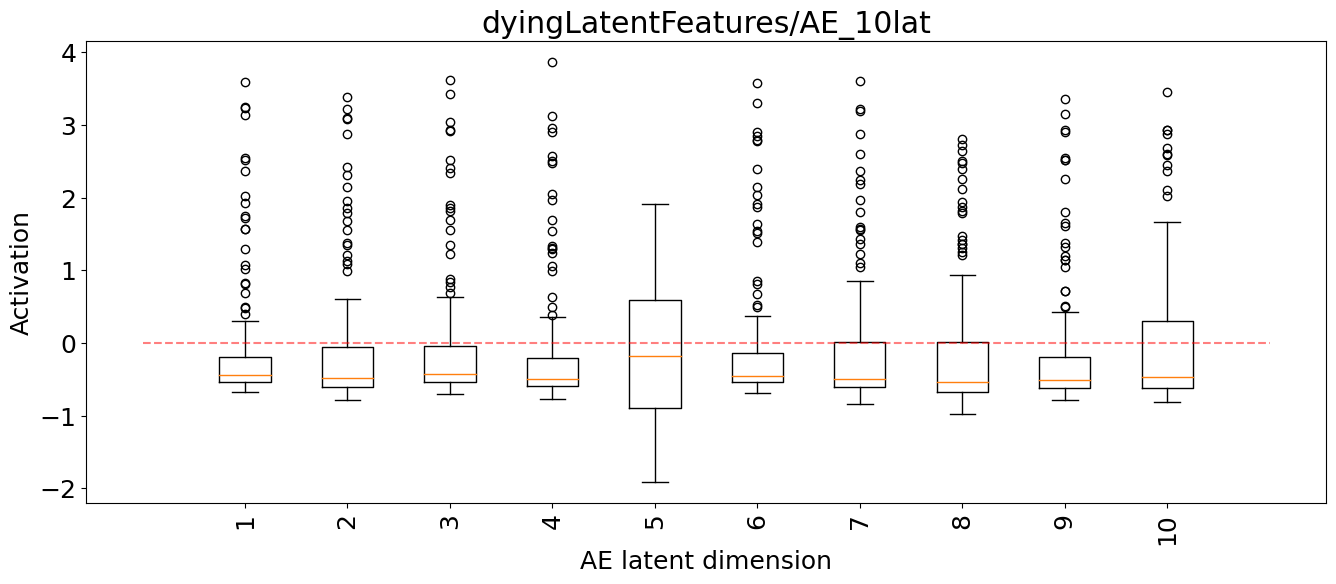

In [7]:
plot_activations_latSpace(model, test_tensor, title=name)

In [186]:
# with torch.no_grad():
#         latSpace = model.generate_embedding(test_tensor).detach().numpy()

# reducer = umap.UMAP()
# embedding = reducer.fit_transform(latSpace)
# mapper = reducer.fit(latSpace)
# print(f"UMAP dimension: {embedding.shape}")

# import umap.plot
# umap.plot.points(mapper, labels=test_dataset["pheno"]["Age"], show_legend=False)

# Predict from latent space 
with RandomForestRegressor

In [8]:
with torch.no_grad():
        latSpace = model.generate_embedding(test_tensor).detach().numpy()

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score

regr = RandomForestRegressor(random_state=0)

## remove NAs 
df = pd.DataFrame(test_dataset["pheno"]["Age"])
X = latSpace[df.notna()["Age"]]
y = df["Age"][df.notna()["Age"]]

y_pred = cross_val_predict(regr, X, y)
r2 = cross_val_score(regr, X, y)

Text(0, 0.5, 'Predicted Age')

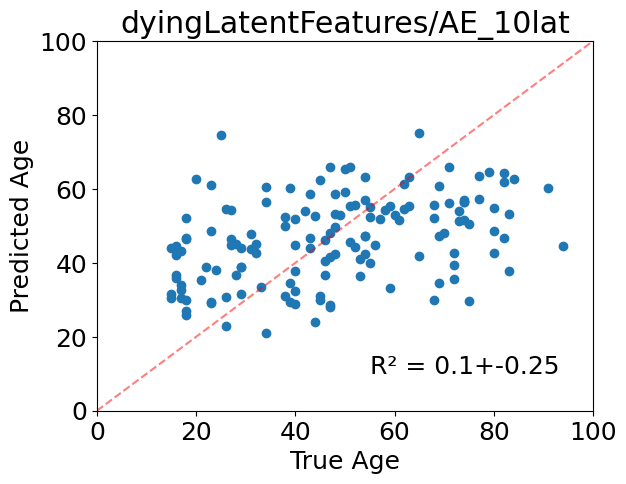

In [10]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="red", linestyle="dashed", alpha=0.5)
ax.text(55, 10, f"R² = {round(r2.mean(),2)}+-{round(r2.std(),2)}")
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title(name)
ax.set_xlabel("True Age")
ax.set_ylabel("Predicted Age")

# Predict from Reconstruction 
with RandomForestRegressor

In [190]:
with torch.no_grad():
        recon = model(test_tensor).detach().numpy()

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score

regr = RandomForestRegressor(random_state=0)

## remove NAs 
df = pd.DataFrame(test_dataset["pheno"]["Age"])
X = recon[df.notna()["Age"]]
y = df["Age"][df.notna()["Age"]]

y_pred = cross_val_predict(regr, X, y)
r2 = cross_val_score(regr, X, y)

Text(0, 0.5, 'Predicted Age')

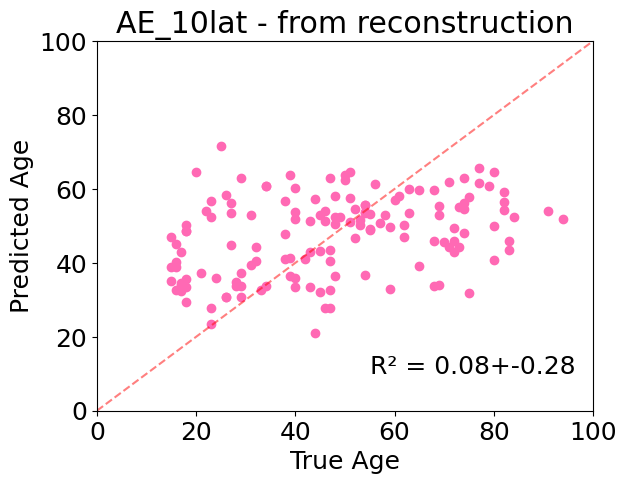

In [194]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, color="hotpink")
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="red", linestyle="dashed", alpha=0.5)
ax.text(55, 10, f"R² = {round(r2.mean(),2)}+-{round(r2.std(),2)}")
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title(f"{name} - from reconstruction")
ax.set_xlabel("True Age")
ax.set_ylabel("Predicted Age")